Loading the DataFrame to the memory

In [14]:
import pandas as pd

df = pd.read_csv("data/lung_cancer_prediction.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


Some information about the DataFrame

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


Checking for any null values

In [16]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

Removing the columns which don't play a role in determining the `Result`
As `Name` and `Surname` are independent of `Result`

In [17]:
df = df.loc[:, "Age":]
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


Checking for any outliers

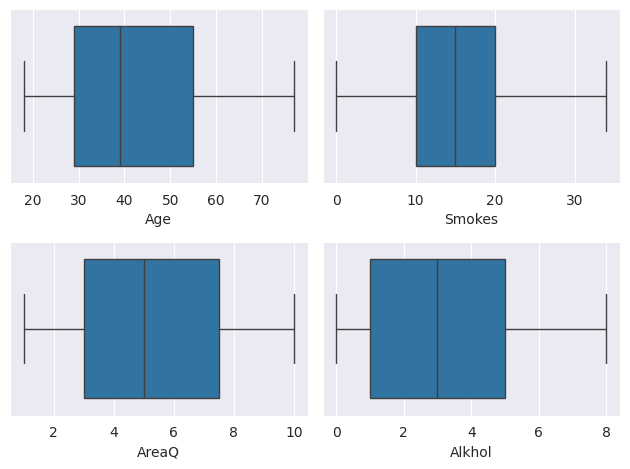

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2)
axes = axes.ravel()

for ax, col in zip(axes, df.columns):
    sns.boxplot(df, x=col, ax=ax)

plt.tight_layout()
plt.show()

Seems like there are not outliers

Formating the data into X and y

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Splitting Dataset into training and testing parts

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Feature Scaling the Data

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Models

### 1. K Nearest Neighbours Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 2. Naive Bayes Classification

In [23]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


### 3. Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4. Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Comparing the resultant accuracies and visualizing the confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clfs = [clf_KNN, clf_NB, clf_DT, clf_RF]
names = ["K Nearest Neighbour", "Naive Bayes", "Decision Tree", "Random Forest"]

for name, clf in zip(names, clfs):
    y_pred = clf.predict(X_test)
    print(f"\n\n{name}")
    print("Confusion Matrix:", confusion_matrix(y_test, y_pred), sep="\n")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:", classification_report(y_test, y_pred), sep="\n")



K Nearest Neighbour
Confusion Matrix:
[[14  0]
 [ 0 16]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Naive Bayes
Confusion Matrix:
[[14  0]
 [ 0 16]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Decision Tree
Confusion Matrix:
[[12  2]
 [ 0 16]]
Accuracy Score: 0.9333333333333333
Classification Report:
              precision    recall  f1-s

From above observation we can say that `Random Forest Classifier` and `Decision Tree Classifier` is not as best performing as compared to other classifier for the chosen dataset and parameters
Where as `K Nearest Neighbour` and `Naive Bayes Classification` has the highest accuracy with default parameter tuning

Note -> We are getting accuracy as 1 because we have very small dataset for training and testing data

# Deep Learning Model

Importing the required ANN libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2025-07-01 13:15:23.566257: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 13:15:23.922442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Building the neural network

In [28]:
clf_NN = Sequential()
clf_NN.add(Dense(32, "relu"))
clf_NN.add(Dense(16, "relu"))
clf_NN.add(Dense(1, activation="sigmoid"))
clf_NN.compile(Adam(), "binary_crossentropy", metrics=["accuracy"])

2025-07-01 13:15:29.388414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-01 13:15:29.572838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-01 13:15:29.572946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-01 13:15:29.577627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-01 13:15:29.577716: I tensorflow/compile

Training the model

In [29]:
NN_model = clf_NN.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

2025-07-01 13:15:34.133272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-07-01 13:15:34.168367: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563371538f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-07-01 13:15:34.168423: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-01 13:15:34.222768: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-01 13:15:34.329394: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2025-07-01 13:15:34.478046: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas d

Visualizing the various parameters while the training process

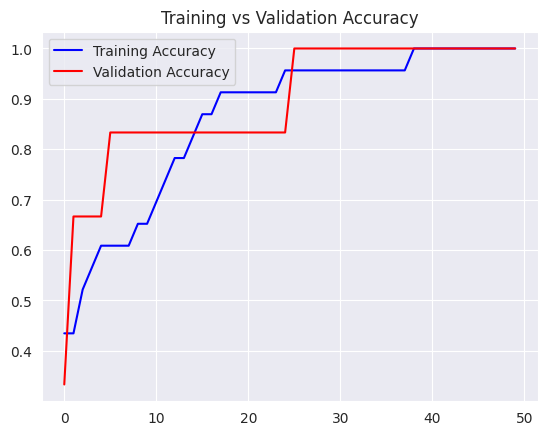

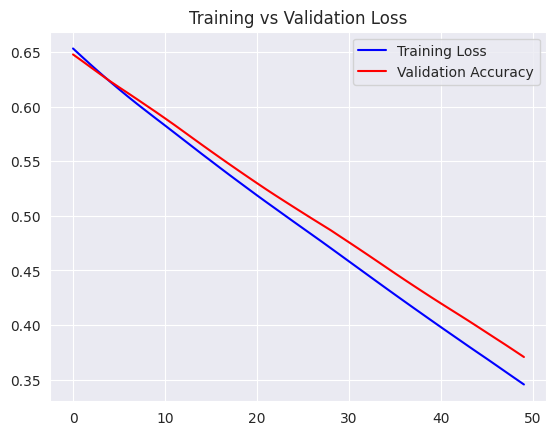

In [30]:
acc = NN_model.history["accuracy"]
val_acc = NN_model.history["val_accuracy"]
loss = NN_model.history["loss"]
val_loss = NN_model.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, "blue", label="Training Accuracy")
plt.plot(epochs, val_acc, "red", label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "blue", label="Training Loss")
plt.plot(epochs, val_loss, "red", label="Validation Accuracy")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

The model's validation part ends up very close to the training part

Predicting the results

In [31]:
y_pred_NN = clf_NN.predict(X_test)

1/1 [==============================] - 0s 81ms/step


Analysis of ANN model prediction

In [32]:
from sklearn.metrics import classification_report

y_pred_NN = (y_pred_NN > 0.5).astype(int)
print("Test accuracy:", accuracy_score(y_test, y_pred_NN))
print(classification_report(y_test, y_pred_NN))

Test accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



The ANN model is very accurate in prediction than the ML models used for classification